In [2]:
import torch 
import torch.nn.functional as F


In [3]:
import torch 
import torch.nn.functional as F


In [4]:
import torch 
import torch.nn.functional as F


In [5]:
import torch 
import torch.nn.functional as F


In [6]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])


In [7]:
# 定义一个Logistic回归模型类，继承自PyTorch中的nn.Module类
class LogisticRegressionModel(torch.nn.Module):
    # 初始化函数
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()  # 调用父类的初始化函数
        # 定义线性层，1个输入特征（x）和1个输出特征（y）
        self.linear = torch.nn.Linear(1, 1)

    # 前向传播函数
    def forward(self, x):
        # 使用sigmoid激活函数进行预测
        y_pred = F.sigmoid(self.linear(x))
        return y_pred


# 创建一个Logistic回归模型实例
model = LogisticRegressionModel()


In [8]:
# 定义二元交叉熵损失函数，size_average参数表示输出是否被平均
criterion = torch.nn.BCELoss(size_average=False)

# 定义随机梯度下降优化器，使用model.parameters()获取需要更新的参数，学习率为0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


d:\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [9]:
# 设置训练循环，将数据集中的所有样本迭代1000次(epoch)
for epoch in range(1000):
    # 运行模型(model)以获取对当前输入(x_data)的预测(y_pred)
    y_pred = model(x_data)
    # 计算损失(loss)，这是神经网络误差的度量，损失越小代表模型拟合得越好
    loss = criterion(y_pred, y_data)
    
    # 打印当前epoch和对应的损失值
    print(epoch, loss.item())

    # 重置优化器的梯度为零，以防止它们在计算下一个batch的梯度时被累积
    optimizer.zero_grad()
    # 在当前batch上计算梯度，并反向传播到模型的每个参数上
    loss.backward()
    # 更新模型参数，以使其更好地拟合训练数据。此处使用优化器(optimizer)来更新权重/偏置
    optimizer.step()


0 3.6096203327178955
1 3.5286645889282227
2 3.449885129928589
3 3.3733327388763428
4 3.2990503311157227
5 3.2270781993865967
6 3.157449245452881
7 3.090193033218384
8 3.025329113006592
9 2.962874174118042
10 2.9028329849243164
11 2.8452072143554688
12 2.789989709854126
13 2.737163543701172
14 2.6867074966430664
15 2.638591766357422
16 2.5927796363830566
17 2.5492262840270996
18 2.5078835487365723
19 2.4686951637268066
20 2.431600570678711
21 2.3965351581573486
22 2.3634300231933594
23 2.3322129249572754
24 2.302809476852417
25 2.2751431465148926
26 2.2491376399993896
27 2.2247133255004883
28 2.201793670654297
29 2.180299758911133
30 2.1601569652557373
31 2.141288995742798
32 2.1236228942871094
33 2.107088327407837
34 2.0916154384613037
35 2.077138900756836
36 2.0635945796966553
37 2.05092191696167
38 2.0390632152557373
39 2.027963161468506
40 2.0175695419311523
41 2.0078341960906982
42 1.9987092018127441
43 1.9901520013809204
44 1.982121229171753
45 1.9745783805847168
46 1.967487692832

d:\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 创建一个包含200个等距样本的数组
x = np.linspace(0, 10, 200)

# 将NumPy数组转换为PyTorch张量，并调整其形状为200行1列
x_t = torch.Tensor(x).view((200, 1))

# 使用名为“model”的预训练模型对输入进行前向传递，得到输出值
y_t = model(x_t)

# 将PyTorch张量转换为NumPy数组
y = y_t.data.numpy()

d:\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


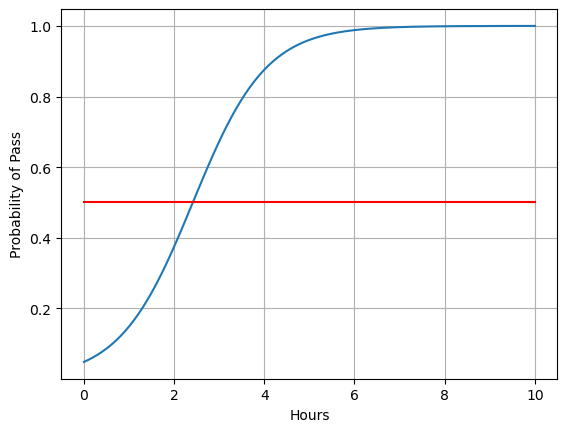

In [12]:
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()
